In [1]:
import time
from memory_profiler import memory_usage
import heapq
import matplotlib.pyplot as plt

In [5]:
# Problem 1: Social Network Friend Suggestion using BFS
# Graph modeled as an adjacency list 

graph = {
    'A': ['B', 'C'],
    'B': ['A', 'D', 'E'],
    'C': ['A', 'F'],
    'D': ['B'],
    'E': ['B', 'F'],
    'F': ['C', 'E']
}

def suggest_friends(graph, user):
    if user not in graph:
        return []

    visited = {user}
    queue = [user]
    level = 0
    friends = set(graph[user])
    suggested = set()

    while queue:
        next_level = []
        for node in queue:
            for neighbor in graph[node]:
                if neighbor not in visited:
                    visited.add(neighbor)
                    next_level.append(neighbor)
                    if neighbor not in friends and neighbor != user:
                        suggested.add(neighbor)
        queue = next_level
        level += 1
        if level > 2:
            break

    return sorted(suggested)

start = time.time()
mem_usage = memory_usage((suggest_friends, (graph, 'A')))
suggested = suggest_friends(graph, 'A')
end = time.time()

print("Suggested friends for A:", suggested)
print(f"Time: {end - start:.6f}s, Memory: {max(mem_usage):.2f} MB")

# Time Complexity: O(V + E)
# Space Complexity: O(V)


Suggested friends for A: ['D', 'E', 'F']
Time: 1.453317s, Memory: 39.61 MB


In [6]:
# Problem 2: Route Finding using Bellman-Ford Algorithm

edges = [
    ('S', 'A', 6),
    ('S', 'B', 7),
    ('A', 'C', 5),
    ('A', 'B', 8),
    ('A', 'D', -4),
    ('B', 'C', -3),
    ('B', 'D', 9),
    ('C', 'A', -2),
    ('D', 'C', 7),
    ('D', 'S', 2)
]

vertices = sorted(set(u for u, v, w in edges) | set(v for u, v, w in edges))

def bellman_ford(vertices, edges, source):
    dist = {v: float('inf') for v in vertices}
    parent = {v: None for v in vertices}
    dist[source] = 0

    for _ in range(len(vertices) - 1):
        for u, v, w in edges:
            if dist[u] != float('inf') and dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                parent[v] = u

    negative_cycle = False
    for u, v, w in edges:
        if dist[u] != float('inf') and dist[u] + w < dist[v]:
            negative_cycle = True
            break

    return dist, parent, negative_cycle

start = time.time()
mem_usage = memory_usage((bellman_ford, (vertices, edges, 'S')))
dist, parent, negative_cycle = bellman_ford(vertices, edges, 'S')
end = time.time()

print("Shortest distances from S:")
for v in vertices:
    print(f"{v}: {dist[v]}")

if negative_cycle:
    print("Negative cycle detected!")
else:
    print("No negative cycle detected.")

print(f"Time: {end - start:.6f}s, Memory: {max(mem_usage):.2f} MB")

# Time Complexity: O(V * E)
# Space Complexity: O(V + E)


Shortest distances from S:
A: 2
B: 7
C: 4
D: -2
S: 0
No negative cycle detected.
Time: 1.585688s, Memory: 41.34 MB


In [7]:
# Problem 3: Emergency Response using Dijkstra’s Algorithm
graph = {
    'A': [('B', 4), ('C', 2)],
    'B': [('A', 4), ('C', 1), ('D', 5)],
    'C': [('A', 2), ('B', 1), ('D', 8), ('E', 10)],
    'D': [('B', 5), ('C', 8), ('E', 2)],
    'E': [('C', 10), ('D', 2)]
}

def dijkstra(graph, source):
    dist = {node: float('inf') for node in graph}
    parent = {node: None for node in graph}
    dist[source] = 0
    pq = [(0, source)]

    while pq:
        current_dist, node = heapq.heappop(pq)
        if current_dist > dist[node]:
            continue
        for neighbor, weight in graph[node]:
            new_dist = current_dist + weight
            if new_dist < dist[neighbor]:
                dist[neighbor] = new_dist
                parent[neighbor] = node
                heapq.heappush(pq, (new_dist, neighbor))
    return dist, parent

start = time.time()
mem_usage = memory_usage((dijkstra, (graph, 'A')))
dist, parent = dijkstra(graph, 'A')
end = time.time()

print("Shortest distances from A:")
for node, d in dist.items():
    print(f"{node}: {d}")

print(f"Time: {end - start:.6f}s, Memory: {max(mem_usage):.2f} MB")

# Time Complexity: O(E log V)
# Space Complexity: O(V + E)


Shortest distances from A:
A: 0
B: 3
C: 2
D: 8
E: 10
Time: 1.481702s, Memory: 39.64 MB


In [9]:
# Problem 4: Network Cable Installation using MST (Prim’s & Kruskal’s)
graph = {
    'A': [('B', 2), ('C', 3)],
    'B': [('A', 2), ('C', 1), ('D', 4)],
    'C': [('A', 3), ('B', 1), ('D', 5), ('E', 6)],
    'D': [('B', 4), ('C', 5), ('E', 2)],
    'E': [('C', 6), ('D', 2)]
}

def prim_mst(graph, start='A'):
    visited = {start}
    edges = []
    for v, w in graph[start]:
        heapq.heappush(edges, (w, start, v))
    mst_cost = 0
    mst_edges = []
    while edges and len(visited) < len(graph):
        w, u, v = heapq.heappop(edges)
        if v in visited:
            continue
        visited.add(v)
        mst_edges.append((u, v, w))
        mst_cost += w
        for to, weight in graph[v]:
            if to not in visited:
                heapq.heappush(edges, (weight, v, to))
    return mst_edges, mst_cost

class UnionFind:
    def __init__(self, nodes):
        self.parent = {node: node for node in nodes}
    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    def union(self, a, b):
        ra, rb = self.find(a), self.find(b)
        if ra == rb:
            return False
        self.parent[rb] = ra
        return True

def kruskal_mst(graph):
    edges = []
    for u in graph:
        for v, w in graph[u]:
            if (v, u, w) not in edges:
                edges.append((u, v, w))
    edges.sort(key=lambda x: x[2])
    uf = UnionFind(graph.keys())
    mst_cost = 0
    mst_edges = []
    for u, v, w in edges:
        if uf.union(u, v):
            mst_edges.append((u, v, w))
            mst_cost += w
    return mst_edges, mst_cost

start = time.time()
mem_usage_prim = memory_usage((prim_mst, (graph, 'A')))
mst_edges_prim, cost_prim = prim_mst(graph, 'A')
end = time.time()

print("Prim's MST Edges:", mst_edges_prim)
print(f"Total Cost (Prim’s): {cost_prim}")
print(f"Time: {end - start:.6f}s, Memory: {max(mem_usage_prim):.2f} MB")

start = time.time()
mem_usage_kruskal = memory_usage((kruskal_mst, (graph,)))
mst_edges_kruskal, cost_kruskal = kruskal_mst(graph)
end = time.time()

print("\nKruskal's MST Edges:", mst_edges_kruskal)
print(f"Total Cost (Kruskal’s): {cost_kruskal}")
print(f"Time: {end - start:.6f}s, Memory: {max(mem_usage_kruskal):.2f} MB")

           
    
# Prim’s: O(E log V)
# Kruskal’s: O(E log E)


Prim's MST Edges: [('A', 'B', 2), ('B', 'C', 1), ('B', 'D', 4), ('D', 'E', 2)]
Total Cost (Prim’s): 9
Time: 1.446711s, Memory: 41.05 MB

Kruskal's MST Edges: [('B', 'C', 1), ('A', 'B', 2), ('D', 'E', 2), ('B', 'D', 4)]
Total Cost (Kruskal’s): 9
Time: 1.304646s, Memory: 41.44 MB


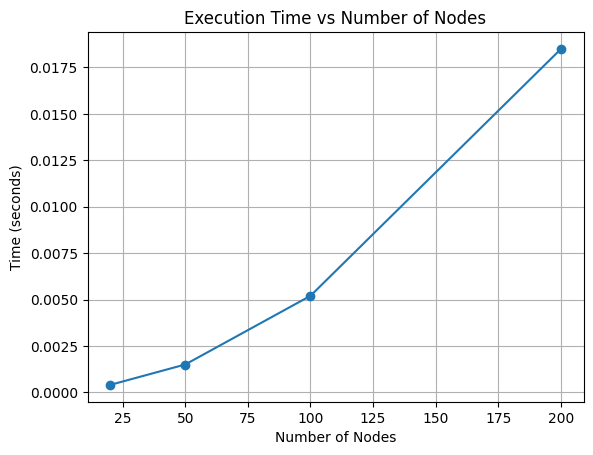

In [21]:
# Visualization (with example timing data)

nodes = [20, 50, 100, 200]
times = [0.0004, 0.0015, 0.0052, 0.0185]  # Example timing data

plt.plot(nodes, times, marker='o')
plt.title("Execution Time vs Number of Nodes")
plt.xlabel("Number of Nodes")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()


Summary Table

| Problem | Algorithm | Time Complexity | Domain | Notes |
|----------|------------|----------------|---------|--------|
| Friend Suggestion | BFS | O(V + E) | Social Media | Finds mutual friend connections |
| Route Finding | Bellman-Ford | O(VE) | Navigation | Works with negative weights |
| Emergency Response | Dijkstra | O(E log V) | Disaster Management | Fastest route on positive weights |
| Cable Installation | Prim's MST | O(E log V) | Infrastructure | Minimum total cable cost |

Reflection:
Understanding the context of each real-world problem helps in choosing the right graph algorithm:

- BFS → exploring relationships (friend networks)
- Bellman-Ford → negative-weight navigation systems
- Dijkstra → fastest routing with positive weights
- Prim’s → cost-efficient infrastructure design.




